<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [2]:

files_path = 'dogs-vs-cats/'

cat_files_path = os.path.join(files_path, 'cat*.jpg')
dog_files_path = os.path.join(files_path, 'dog*.jpg')

train_dir = 'dogs-vs-cats/train/'
test_dir = 'dogs-vs-cats/test1/'
img_size = 227;

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [3]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    #################
    cat_or_dog = img.split('.')[0]
    if cat_or_dog == 'cat': 
        return [1,0]
    elif cat_or_dog == 'dog':
        return [0,1]
    else:
        print('error: cannot create label')
    #################

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [4]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_data_from_path(dir, create_label =True):
    ###create a list###
    ####for loop to fetch img from directory (hint:use tqdm)###
    data = []
    for file in tqdm(os.listdir(dir)):
        path = os.path.join(train_dir,file)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, (img_size,img_size),interpolation = cv2.INTER_AREA)
            ###get label of img###
            if create_label:
                label = label_img(file)
                ###use cv2 to read the img and resize the it to (227 x 227)###
                data.append([np.array(img),np.array(label)])
            ###append the img and label to the list###
            else:
                 data.append(np.array(img))
    ###shuffle training data###
    shuffle(data)
    ###return training data###
    return data

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

N/A

<p style="font-size:20px">Step 4: create your train and test data</p>

In [5]:
train_data = create_data_from_path(train_dir)
test_data = create_data_from_path(test_dir,False)

100%|██████████| 12500/12500 [00:00<00:00, 89412.79it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

(227, 227, 3)


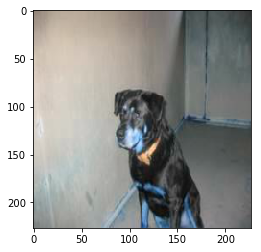

In [6]:
sample_image = train_data[2][0]
print(sample_image.shape)
plt.imshow(sample_image)
plt.show()

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [7]:
X_train_all = np.array([item[0] for item in train_data])
Y_train_all = np.array([item[1] for item in train_data])

In [8]:

X_valid = X_train_all[:500,:,:,:]
Y_valid = Y_train_all[:500,:]
X_train = X_train_all[500:,:,:,:]
Y_train = Y_train_all[500:,:]


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [9]:
max_bytes = 2**31 - 1

n =X_train.shape[0]
idx = 0
fileidx = 1;
while idx < n:
#     batch_size = min(n - idx, 1 << 31 - 1)
    batch_size= 4900;
    print("writing bytes [%s, %s)... " % (idx, idx + batch_size), end="", flush=True)
    with open('dogs-vs-cats-preprocessed/train'+str(fileidx), 'wb') as f_out:
        pickle.dump([X_train[idx:idx + batch_size,:,:,:], Y_train[idx:idx + batch_size,:]], f_out, protocol=pickle.HIGHEST_PROTOCOL)
    idx += batch_size
    fileidx += 1   
    print("done.", flush=True)

writing bytes [0, 4900)... done.
writing bytes [4900, 9800)... done.
writing bytes [9800, 14700)... done.
writing bytes [14700, 19600)... done.
writing bytes [19600, 24500)... done.


In [10]:
with open('dogs-vs-cats-preprocessed/valid', 'wb') as f_out:
    pickle.dump([X_valid,Y_valid], f_out, protocol=pickle.HIGHEST_PROTOCOL)